In [1]:
# In this project, we explore and compare the performance of three different models—Neural Networks, Convolutional Neural Networks (CNN),
# and Deep Convolutional Neural Networks—using a common dataset to analyze their effectiveness in solving complex machine learning tasks.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

**Loading Data**

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Input Image Preprocessing**

In [4]:
#Reshape and normalize data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [5]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

**BASIC NEURAL NETWORK**

In [7]:
# Define a simple neural network
model_nn = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')])

# Compile the model
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_nn = model_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7679 - loss: 0.6640 - val_accuracy: 0.8445 - val_loss: 0.4351
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8613 - loss: 0.3868 - val_accuracy: 0.8738 - val_loss: 0.3496
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8750 - loss: 0.3399 - val_accuracy: 0.8699 - val_loss: 0.3573
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8841 - loss: 0.3196 - val_accuracy: 0.8770 - val_loss: 0.3358
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8893 - loss: 0.2976 - val_accuracy: 0.8807 - val_loss: 0.3284
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8946 - loss: 0.2836 - val_accuracy: 0.8827 - val_loss: 0.3226
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8990 - loss: 0.2674 - val_accuracy: 0.8857 - val_loss: 0.3212
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9045 - loss: 0.253

In [8]:
# Model 1 - Neural Network: This model is a basic fully connected neural network with two hidden layers.
# It flattens the input, applies ReLU activations, and uses softmax for classification.

**BASIC Convolutional NEURAL NETWORK**

In [9]:
# Define a basic CNN model
model_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn = model_cnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.8056 - loss: 0.5551 - val_accuracy: 0.8833 - val_loss: 0.3180
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.8959 - loss: 0.2867 - val_accuracy: 0.9043 - val_loss: 0.2684
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9160 - loss: 0.2311 - val_accuracy: 0.9088 - val_loss: 0.2499
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.9268 - loss: 0.1989 - val_accuracy: 0.9114 - val_loss: 0.2474
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9363 - loss: 0.1727 - val_accuracy: 0.9143 - val_loss: 0.2459
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9474 - loss: 0.1464 - val_accuracy: 0.9070 - val_loss: 0.2831
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9549 - loss: 0.1246 - val_accuracy: 0.9063 - val_loss: 0.2689
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9635 -

In [10]:
# Model 2 - Basic CNN: This is a simple CNN model with one convolutional layer, followed by max-pooling, and a fully connected layer.
# This model is more powerful for image data than the basic neural network.

**DEEPER CNN WITH DROPOUT**

In [11]:
# Define a deeper CNN model with dropout
model_deep_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model_deep_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_deep_cnn = model_deep_cnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.6748 - loss: 0.8931 - val_accuracy: 0.8441 - val_loss: 0.4141
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.8315 - loss: 0.4622 - val_accuracy: 0.8794 - val_loss: 0.3290
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.8579 - loss: 0.3919 - val_accuracy: 0.8812 - val_loss: 0.3152
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.8691 - loss: 0.3592 - val_accuracy: 0.8911 - val_loss: 0.2883
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.8730 - loss: 0.3380 - val_accuracy: 0.8992 - val_loss: 0.2678
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.8831 - loss: 0.3216 - val_accuracy: 0.9018 - val_loss: 0.2681
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.8888 - loss: 0.3008 - val_accuracy: 0.9067 - val_loss: 0.2577
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 40ms/step - accuracy: 0.8923 -

In [12]:
# Model 3 - Deeper CNN: This model introduces more convolutional layers and dropout regularization to prevent overfitting,
# making it a more complex architecture compared to the basic CNN.

**EVALUATION AND COMPARISON**

In [13]:
# Evaluate models on the test set
test_loss_nn, test_acc_nn = model_nn.evaluate(X_test, y_test)
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_test, y_test)
test_loss_deep_cnn, test_acc_deep_cnn = model_deep_cnn.evaluate(X_test, y_test)

# Print the test accuracies for comparison
print(f"Test Accuracy - Neural Network: {test_acc_nn:.4f}")
print(f"Test Accuracy - Basic CNN: {test_acc_cnn:.4f}")
print(f"Test Accuracy - Deeper CNN: {test_acc_deep_cnn:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8862 - loss: 0.4403
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8975 - loss: 0.7534
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9116 - loss: 0.2534
Test Accuracy - Neural Network: 0.8837
Test Accuracy - Basic CNN: 0.8993
Test Accuracy - Deeper CNN: 0.9142


**PLOTTING ACCURACY AND LOSS**

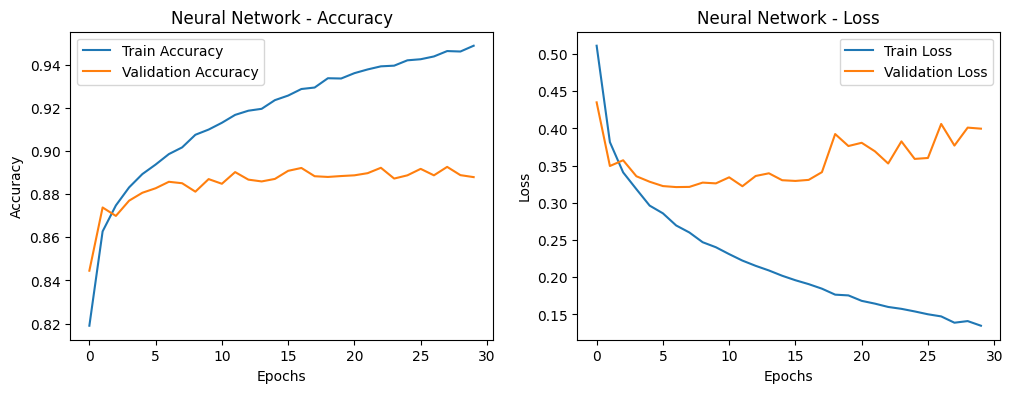

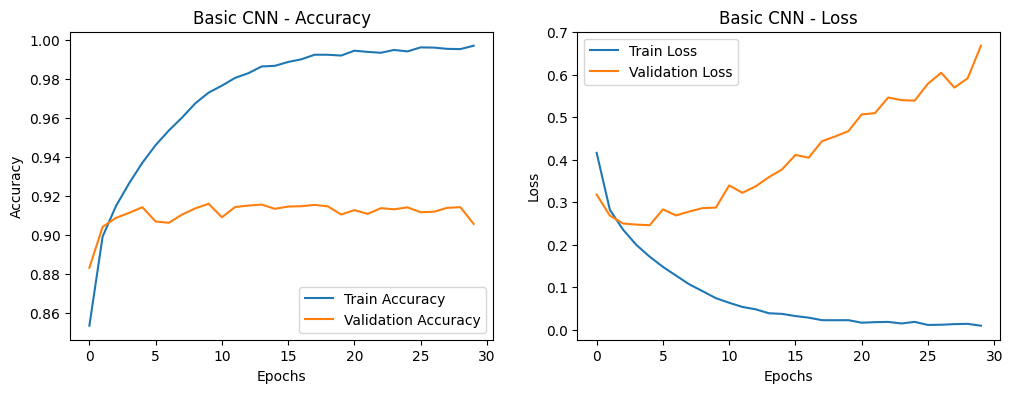

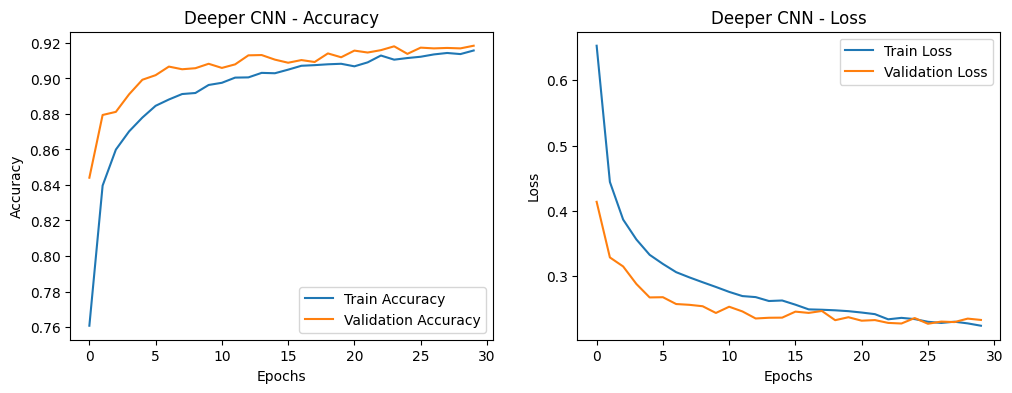

In [14]:
# Function to plot accuracy and loss curves
def plot_history(history, model_name):
    # Plot accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot histories for all models
plot_history(history_nn, 'Neural Network')
plot_history(history_cnn, 'Basic CNN')
plot_history(history_deep_cnn, 'Deeper CNN')